In [1]:
y(x) = 7x + 5

y (generic function with 1 method)

In [2]:
x = 0 : 0.1 : 5

0.0:0.1:5.0

In [3]:
using Plots

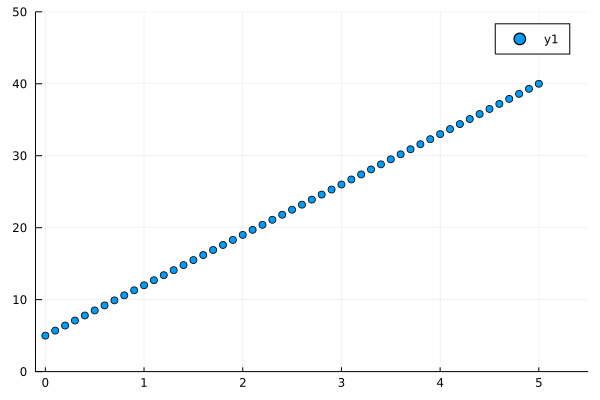

In [4]:
scatter_plot = scatter(x, y.(x), xlims = (-0.1, 5.5), ylims = (0, 50))

In [5]:
permutations = ((u, v) for u in 1:2 for v in 1:2)

for permutation in permutations
    print(permutation, " ")
end

(1, 1) (1, 2) (2, 1) (2, 2) 

In [6]:
m, c = (5, 7)
println("m = ", m)
println("c = ", c)

m = 5
c = 7


In [7]:
function mutate(value, mutations = 10)
    [value + rand() - 0.5 for i in 1:mutations]
end

function mutate(mc::Tuple, number_of_mutations = 10)
    m, c = mc
    ms = mutate(m, number_of_mutations)
    cs = mutate(c, number_of_mutations)
    
    [(ms[i], cs[i]) for i in 1:number_of_mutations]
end

mutate (generic function with 4 methods)

In [8]:
mutate((1, 2))

10-element Vector{Tuple{Float64, Float64}}:
 (1.272652816809025, 1.5183282435138135)
 (0.9548850465488994, 2.106657963018537)
 (0.7672502134180077, 1.72495324836789)
 (0.7679129217003309, 2.1741279903020763)
 (1.1665592036997918, 1.6090731724201017)
 (0.5946590297934791, 1.9829347070099006)
 (1.0537510081526493, 1.5909737943439142)
 (1.0507766723407745, 2.179800279448288)
 (1.0114043988097405, 1.7266000974224411)
 (0.6744123835550517, 2.1566115575773)

In [9]:
∆(m, c, x, y) = (m * x + c) - y

∆ (generic function with 1 method)

In [10]:
∆(5, 4, 10, y(10))

-21

In [11]:
function total_error(m, c, x, y)
    ΣΔ = 0
    
    for i in 1:length(x)
        ΣΔ += abs(∆(m, c, x[i], y[i]))
    end
    
    ΣΔ
end

total_error (generic function with 1 method)

In [12]:
total_error(5, 4, [1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

80

In [13]:
function top_survivors(mcs, x_train, y_train, top_percent = 10)
    errors_and_values = []
    
    for mc in mcs
        m, c = mc
        error = total_error(m, c, x_train, y_train)
        push!(errors_and_values, (error, mc))
    end

    
    sorted_errors_and_values = sort(errors_and_values)
    end_number = Int(length(mcs) * top_percent / 100)
    sorted_errors_and_values[1:end_number]
end

top_survivors (generic function with 2 methods)

In [14]:
x_train = [1, 2, 3, 4, 5]
y_train = y.(x_train)
mcs = mutate((0, 0))

10-element Vector{Tuple{Float64, Float64}}:
 (0.1554128788582123, 0.380525884854118)
 (0.23613063850286498, 0.10202041943832363)
 (0.3404286650209203, 0.22633785295418218)
 (0.43550211885634793, -0.2580038609361657)
 (-0.23158481856134872, -0.40531988677958153)
 (0.285360966809884, -0.46470562747764244)
 (0.44421652328266337, -0.34754714624427385)
 (-0.49546383361919744, -0.37713222155862014)
 (-0.37616705961717045, 0.44718267545599133)
 (-0.07127427913866313, 0.28781735549711884)

In [15]:
top_survivors(mcs, x_train, y_train)

1-element Vector{Any}:
 (123.7618807599153, (0.3404286650209203, 0.22633785295418218))

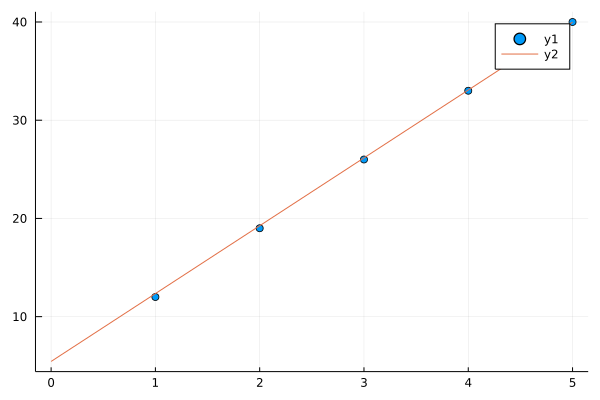

In [16]:
generations = 40

top_survivor = Nothing
mc = (0, 0)

for i in 1:generations
    mcs = mutate(mc)
    top_survivor = top_survivors(mcs, x_train, y_train)[1]
    _error, mc = top_survivor
end

hm, hc = mc
p = scatter(x_train, y_train)
h(x) = hm * x + hc
plot!(p, x, h.(x))

┌ Info: Saved animation to 
│   fn = /Users/mindaslab/data_science_with_julia/code/tmp.gif
└ @ Plots /Users/mindaslab/.julia/packages/Plots/g581z/src/animation.jl:104


Plots.AnimatedGif("/Users/mindaslab/data_science_with_julia/code/tmp.gif")
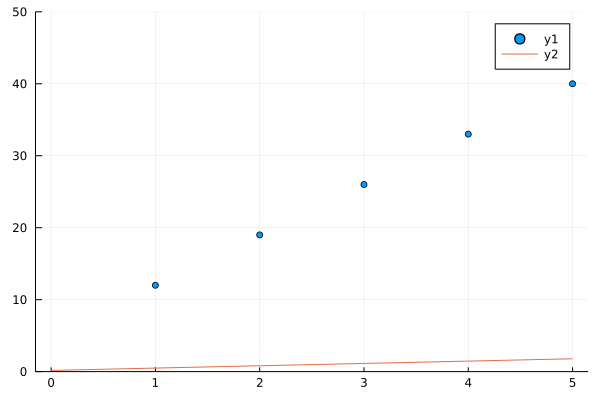

In [17]:
generations = 40

top_survivor = Nothing
mc = (0, 0)

@gif for i in 1:generations
    mcs = mutate(mc)
    top_survivor = top_survivors(mcs, x_train, y_train)[1]
    _error, mc = top_survivor
    
    hm, hc = mc
    p = scatter(x_train, y_train)
    h(x) = hm * x + hc
    plot!(p, x, h.(x), ylims = (0, 50))
end

In [18]:
mc

(7.143033187608612, 4.722070930099822)